(400, 4096)
7
7
7
7


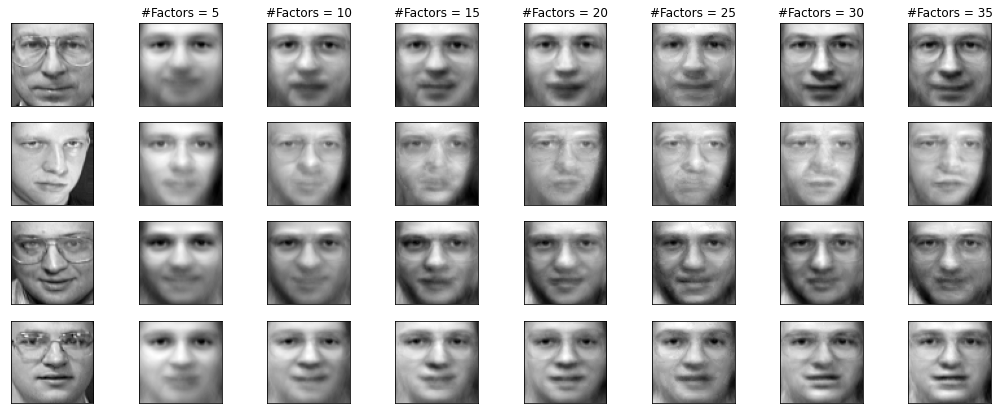

In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn import decomposition 

dataset = fetch_olivetti_faces(random_state=14)
faces = dataset.data
print(faces.shape)
n_faces, n_hidden_factors = 4, 7
def plot_gallery(images, n_col=n_hidden_factors+1, n_row=n_faces,
                 cmap=plt.cm.gray):
    fig, axs = plt.subplots(n_row,n_col, figsize=(18,7),
                            subplot_kw={'xticks':(), 'yticks':()})
    for i, image in zip(range(n_faces*(n_hidden_factors+1)), images):
        r = int(i/n_col); c = i%n_col
        axs[r,c].imshow(image.reshape((64, 64)), cmap=cmap)
        if (r == 0 and c!=0):
            axs[r,c].set_title('#Factors = ' + str(c*5)) 

images = []
for face in [120,9,300,50]:  # some faces from the 400 dataset samples
    images.append(faces[face])  # draw the original image
    print(n_hidden_factors)
    for compressed in range(5,5+n_hidden_factors*5,5):
        estimator = decomposition.NMF(n_components=compressed,
                                      init='nndsvda', tol=5e-3)
        W = estimator.fit_transform(faces)
        # draw the compressed image
        images.append(estimator.inverse_transform(W[face]))    
plot_gallery(images)

plt.show()

In [9]:
import numpy as np
dataset = fetch_olivetti_faces(random_state=14)
print(np.array(dataset['data'])[0])

[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]


In [23]:
import cv2
import numpy as np
import imutils
from google.colab.patches import cv2_imshow
imagen = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Dataset/descarganiña.jpg')

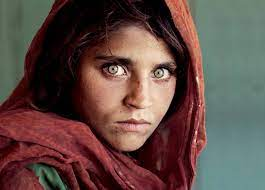

In [21]:
cv2_imshow(imagen)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [72]:
rojoBajo1 = np.array([10, 40, 90], np.uint8)
rojoAlto1 = np.array([200, 155, 155], np.uint8)

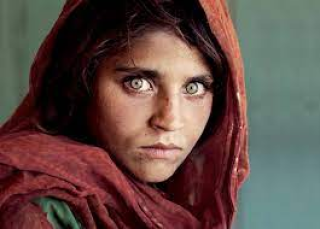

[ 86 103  89]


In [58]:
image = imutils.resize(imagen, width=320)
cv2_imshow(image)
print(image[0][0])

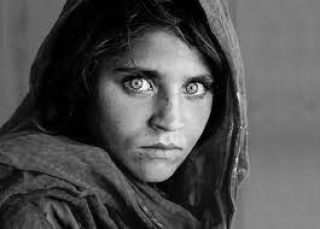

97


In [59]:
imagegray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(imagegray)
print(imagegray[0][0])

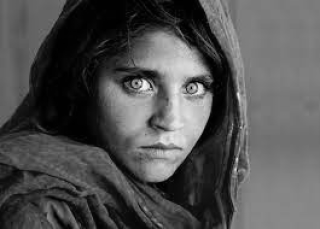

[97 97 97]


In [60]:
imagegray = cv2.cvtColor(imagegray,cv2.COLOR_GRAY2BGR)
cv2_imshow(imagegray)
print(imagegray[0][0])

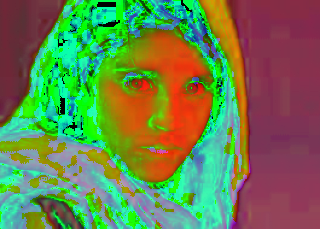

[ 55  42 103]


In [70]:
imageHSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2_imshow(imageHSV)
print(imageHSV[0][0])

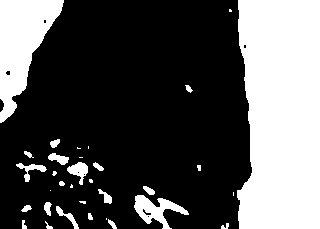

In [73]:
maskRojo1 = cv2.inRange(imageHSV, rojoBajo1, rojoAlto1)
#mask = cv2.add(maskRojo1,maskRojo2)
mask = cv2.medianBlur(maskRojo1, 7)

cv2_imshow(mask)

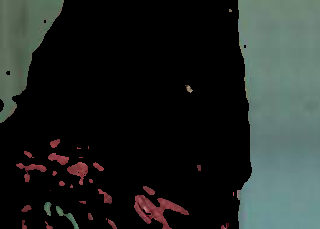

In [74]:
redDetected = cv2.bitwise_and(image,image,mask=mask)
cv2_imshow(redDetected)

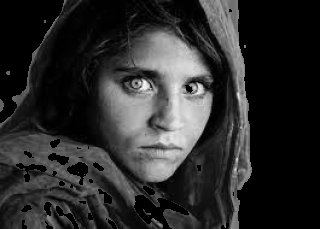

In [75]:
invMask = cv2.bitwise_not(mask)
bgGray = cv2.bitwise_and(imagegray,imagegray,mask=invMask)
cv2_imshow(bgGray)

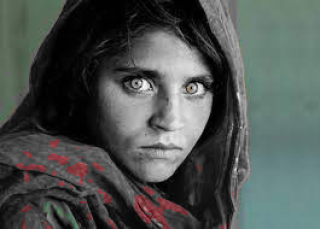

In [76]:
finalImage = cv2.add(bgGray,redDetected)
# Visualización
cv2_imshow(finalImage)